In [226]:

import mne


import pandas as pd
import mtrf
from mtrf.model import TRF
from mtrf.stats import crossval, nested_crossval
import eelbrain as eel

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import wavfile, loadmat, savemat
from scipy.signal import hilbert

from collections import Counter

import sys
sys.path.append('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils')
from pp_utils import *
from plot_utils import *
from mTRF_utils import *
from midi_utils import *
from update_sub_lists import*
from ERP_utils import *

import pickle
import os

In [227]:
mapchange_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected/'
pred_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/rTRF_predictions'
sv_dir ='/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mtrf_error_surprise/sv/'


## Visualize predictions

In [228]:
subject = '10'
period = 'pre'

In [229]:
pred_data = loadmat(os.path.join(pred_dir, f'pred_err_{subject}_{period}.mat'))
pred_stim = pred_data['predicted_stim']
pred_corr = pred_data['pearsonr']
sv = loadmat(os.path.join(sv_dir, f'sv_data_{period}_{subject}.mat'))['firsts']


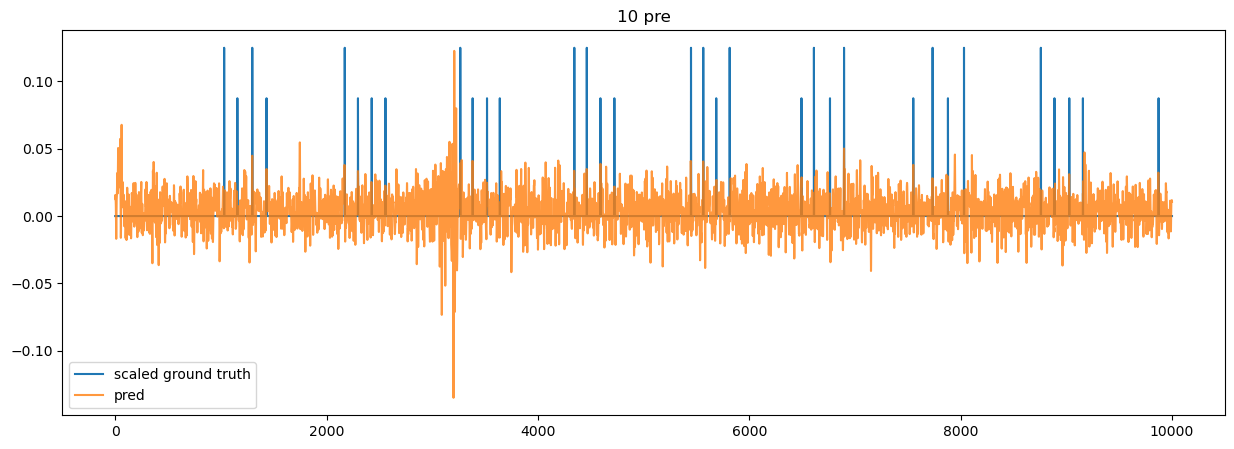

In [230]:
plt.figure(figsize = (15,5))
plt.plot(sv[0][0:10000]/8, label = 'scaled ground truth')
plt.plot(pred_stim[0][0:10000], alpha = 0.8, label = 'pred')
plt.title(f'{subject} pre')
plt.legend()

In [231]:
pred_corr

array([[0.06308127]])

In [232]:
#load predictions

# fo_df = pd.read_csv(os.path.join(mapchange_path, f'mapchange_keystrokes_pre_{subject}.csv'))
# others_times = fo_df[fo_df['type']=='other']['time']
# firsts_times = fo_df[fo_df['type']=='first']['time']

## Correlate with scores

In [242]:
subjects_to_process = ['06', '07', '08', '09', '10', '11', '12']

In [233]:
scores_df = pd.read_csv('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils/training_scores_rank.csv') 

In [238]:
pearsonrs = []
for subject in subjects_to_process:
    pred_data = loadmat(os.path.join(pred_dir, f'pred_err_{subject}_{period}.mat'))
   # pred_stim = pred_data['predicted_stim']
    pred_corr = pred_data['pearsonr']
    pearsonrs.append(pred_corr[0][0])



In [239]:
pearsonrs

[0.0993751029515483,
 0.07152853505765183,
 0.09843191035625018,
 0.19691075668113894,
 0.06308127138216633,
 0.07851942742193306,
 0.06866190833639943]

## Firsts vs others

In [244]:
firsts_amp = []
others_amp = []
for subject in subjects_to_process:
    pred_data = loadmat(os.path.join(pred_dir, f'pred_err_{subject}_{period}.mat'))
    pred_stim = pred_data['predicted_stim'][0]

    #find times for keystrokes
    fo_df = pd.read_csv(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected/mapchange_keystrokes_{period}_{subject}.csv')
    others_times = fo_df[fo_df['type']=='other']['time']
    firsts_times = fo_df[fo_df['type']=='first']['time']

    #compare reconstructed amplitudes at keystrokes
    amp_others = pred_stim[others_times].mean()
    amp_firsts = pred_stim[firsts_times].mean()

    others_amp.append(amp_others)
    firsts_amp.append(amp_firsts)

In [245]:
others_amp

[0.021582567649878294,
 0.016634139872842783,
 0.025221536963447685,
 0.05077384516572649,
 0.018825966079630357,
 0.01827134365802361,
 0.012593045064717782]

In [246]:
firsts_amp

[0.023126385812663963,
 0.019011010311316738,
 0.02793810948371556,
 0.05244557594382232,
 0.020855849687104827,
 0.02095451519674535,
 0.013419375029281038]

Text(0.5, 1.0, 'reconstructed amplitude at time of note onset')

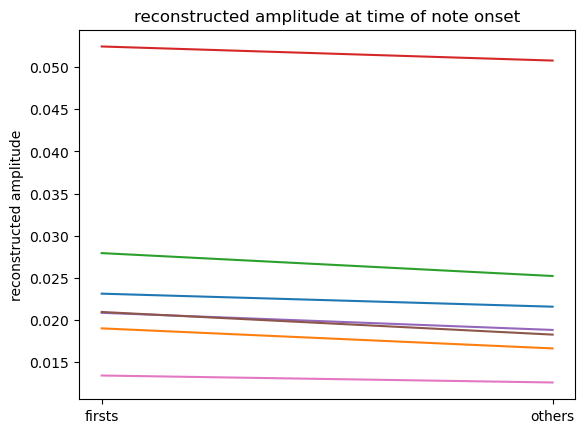

In [250]:
for i in range(len(firsts_amp)):
    plt.plot([1,2], [firsts_amp[i], others_amp[i]])

plt.ylabel('reconstructed amplitude')
plt.xticks([1,2], labels = ['firsts', 'others'])
plt.title('reconstructed amplitude at time of note onset')